### Convolutional Neural Networks
   
   Convolutional Neural Networks is the standard form of neural network architecture for solving tasks associated with images. Solutions for tasks such as object detection, face detection, pose estimation and more all have CNN architecture variants.

   A few characteristics of the CNN architecture makes them more favourable in several computer vision tasks. I have written previous articles that dive into each characteristic.

* Local Receptive Fields
* Sub-Sampling
* Weight Sharing

### LeNet-5

   LeNet-5 CNN architecture is made up of 7 layers. The layer composition consists of 3 convolutional layers, 2 subsampling layers and 2 fully connected layers

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/1_ueA-rooOaiIo3s2rVVz3Ww.png?raw=true'>

   The diagram above shows a depiction of the LeNet-5 architecture, as illustrated in the [original paper](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf).
    
   The first layer is the input layer — this is generally not considered a layer of the network as nothing is learnt in this layer. The input layer is built to take in 32x32, and these are the dimensions of images that are passed into the next layer. Those who are familiar with the MNIST dataset will be aware that the MNIST dataset images have the dimensions 28x28. To get the MNIST images dimension to the meet the requirements of the input layer, the 28x28 images are padded.

   The grayscale images used in the research paper had their pixel values normalized from 0 to 255, to values between -0.1 and 1.175. The reason for normalization is to ensure that the batch of images have a mean of 0 and a standard deviation of 1, the benefits of this is seen in the reduction in the amount of training time. In the image classification with LeNet-5 example below, we’ll be normalizing the pixel values of the images to take on values between 0 to 1.
**The LeNet-5 architecture utilizes two significant types of layer construct: convolutional layers and subsampling layers.**

* Convolutional layers
* Sub-sampling layers
   
 Within the research paper and the image below, convolutional layers are identified with the ‘Cx’, and subsampling layers are identified with ‘Sx’, where ‘x’ is the sequential position of the layer within the architecture. ‘Fx’ is used to identify fully connected layers. This method of layer identification can be seen in the image above.

   The official first layer convolutional layer C1 produces as output 6 feature maps, and has a kernel size of 5x5. The kernel/filter is the name given to the window that contains the weight values that are utilized during the convolution of the weight values with the input values. 5x5 is also indicative of the local receptive field size each unit or neuron within a convolutional layer. The dimensions of the six feature maps the first convolution layer produces are 28x28.
   A subsampling layer ‘S2’ follows the ‘C1’ layer’. The ‘S2’ layer halves the dimension of the feature maps it receives from the previous layer; this is known commonly as downsampling.
   The ‘S2’ layer also produces 6 feature maps, each one corresponding to the feature maps passed as input from the previous layer. This link contains more information on subsampling layers.

### Outline 
* Downloading datasets (CIFAR10)
* Dataloader in torch.utils
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Simple Visualisation


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### Data Loading


* Datasets Detail site [link](https://www.cs.toronto.edu/~kriz/cifar.html)

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True,
                                       transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


### Visualise Data

In [6]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)


(32, 32, 3)


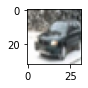

In [9]:
plt.figure(figsize = (1, 1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

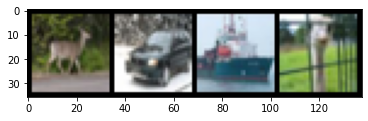

deer car ship bird


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

### Single Convolutional Layer

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1, 1), stride=(2, 2))# padding =(1,1), stride=(2, 2)
    
    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


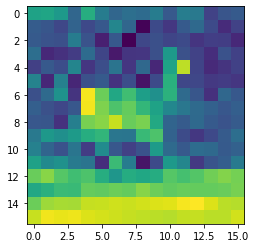

In [17]:
plt.imshow(out[0,0, :, :].detach().numpy())
plt.show()

### Deep Convolution Network

In [18]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3), # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)) # (N, 9, 30, 30) -> (N, 16, 28, 28)
    
    def forward(self, x):
        x = self.model(x)
        return x

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

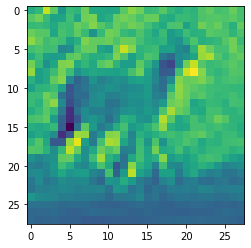

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [21]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),           # (N, 3, 32, 32) -> (N, 6, 28 ,28)
            nn.AvgPool2d(2, stride=2),    # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),          # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2))    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        
     
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
net =  FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

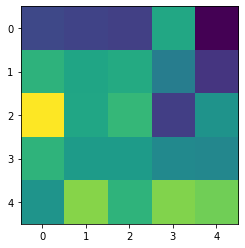

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

### LeNet

In [24]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),         # (N, 400) -> (N, 120)
            nn.LeakyReLU(),
            nn.Linear(120, 84),          # (N, 120) -> (N, 84)
            nn.LeakyReLU(),
            nn.Linear(84, 10))           # (N, 84) -> (N, 10)
        
    
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[ 0.0151,  0.0721,  0.0945, -0.0653,  0.0687,  0.0989,  0.0039,  0.0515,
          0.0697,  0.0839],
        [ 0.0257,  0.0721,  0.0829, -0.0584,  0.0728,  0.1097,  0.0070,  0.0480,
          0.0591,  0.0869],
        [ 0.0330,  0.0767,  0.0826, -0.0612,  0.0676,  0.1207,  0.0127,  0.0468,
          0.0491,  0.0958],
        [ 0.0252,  0.0746,  0.0878, -0.0598,  0.0734,  0.1039,  0.0063,  0.0477,
          0.0595,  0.0872]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([5, 5, 5, 5])


### Training LeNet

In [28]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),         # (N, 400) -> (N, 120)
            nn.LeakyReLU(),
            nn.Linear(120, 84),          # (N, 120) -> (N, 84)
            nn.LeakyReLU(),
            nn.Linear(84, 10))           # (N, 84) -> (N, 10)
        
    
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [31]:
net = LeNet()

In [32]:
import torch.optim as optim 
 
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 40.42, Train acc: 40.32
Epoch: 1/16, Test acc: 43.81, Train acc: 44.33
Epoch: 2/16, Test acc: 47.88, Train acc: 49.07
Epoch: 3/16, Test acc: 50.82, Train acc: 51.68
Epoch: 4/16, Test acc: 51.65, Train acc: 53.73
Epoch: 5/16, Test acc: 53.03, Train acc: 55.84
Epoch: 6/16, Test acc: 53.55, Train acc: 56.69
Epoch: 7/16, Test acc: 55.48, Train acc: 59.30
Epoch: 8/16, Test acc: 55.78, Train acc: 59.94
Epoch: 9/16, Test acc: 55.23, Train acc: 59.48
Epoch: 10/16, Test acc: 57.03, Train acc: 62.01
Epoch: 11/16, Test acc: 57.61, Train acc: 63.45
Epoch: 12/16, Test acc: 58.23, Train acc: 64.75
Epoch: 13/16, Test acc: 58.49, Train acc: 65.24
Epoch: 14/16, Test acc: 59.02, Train acc: 66.85
Epoch: 15/16, Test acc: 59.45, Train acc: 68.08


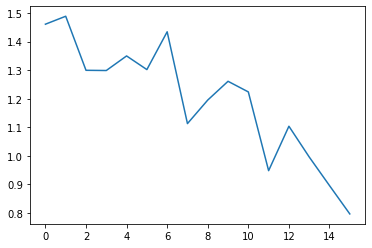

CPU times: user 6min 22s, sys: 571 ms, total: 6min 22s
Wall time: 6min 25s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
    
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        opt.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
plt.plot(loss_epoch_arr)
plt.show()

### Move to GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [36]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters()) 

In [37]:
%%time
max_epochs = 16

for epoch in range(max_epochs):
    
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        opt.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 42s, sys: 554 ms, total: 1min 43s
Wall time: 1min 44s


In [38]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 59.77, Train acc: 69.15


### Basic Visualisation

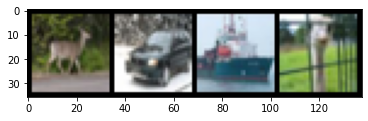

In [39]:
imshow(torchvision.utils.make_grid(images))

In [40]:
net = net.to('cpu')

In [41]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [42]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

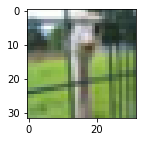

In [43]:
image_id = 3
plt.figure(figsize = (2, 2))
imshow(images[image_id,])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


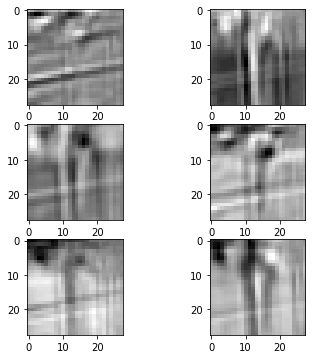

In [44]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i ,:, :].detach().numpy(), cmap="binary")
plt.show()